Центральная предельная теорема

Для своего домашнего задания я взяла Непрерывное распределение Рэлея, которое присутствует в scipy.stats

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import math
%matplotlib inline

Распределение Рэлея:

Генерация выборки объёма 1000

In [24]:
rayleigh_rv = sts.rayleigh(loc=0, scale=1)
sample = rayleigh_rv.rvs(1000)

Построим теоретическую и эмпирическую функции распределения (дополнительный пункт, до начала задания - для наглядности):

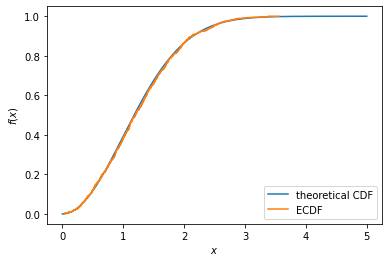

In [25]:
# Задаём ось x
x = np.linspace(0, 5, 1000)

# Теоретическая функция распределения:
cdf = rayleigh_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# Эмпирическая функция распределения (по нашей выборке объёма 1000):
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='lower right')

Из-за достаточно большого объёма выборки можем убедиться, что эмпирическая функция довольно "близка" к теоретической.

Теперь построим гистограмму выборки и график теоретической функции плотности распределения нашей случайной величины:

Text(0.5, 0, '$x$')

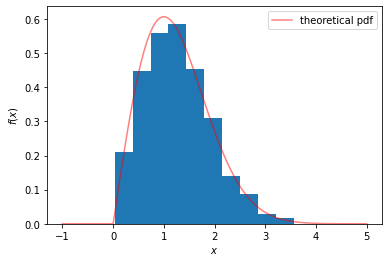

In [26]:
# Гистограмма выборки:
plt.hist(sample, density = True)

# Теоретическая плотность распределения
x = np.linspace(-1,5,1000)
pdf = rayleigh_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5, color='red')

plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Применение центральной предельной теоремы

Сейчас мы будем для каждого значения n - объёма выборки (3, 5, 10, 30, 50) - генерировать 1000 выборок объёма n, для каждой считать выборочное среднее и строить гистограммы распределений выборочных средних для каждого n, а поверх гистограмм строить графики плотности вероятности для нормальных распределений, которые аппроксимирующт выборочные средние при различных n по ЦПТ:

AttributeError: 'Rectangle' object has no property 'normed'

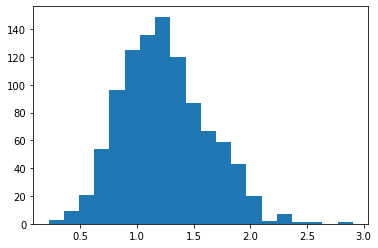

In [27]:
sigma = 1 # "по умолчанию"

# Теоретические среднее (мат. ожидание) и дисперсия распределния Рэлея
th_mean = math.sqrt(math.pi / 2) * sigma
th_disp = (2 - math.pi / 2)

# Сначала строим гистограмму по выборке объёма n
n = 3
sample_n3 = list()

for i in range(0, 1001):
    tmp_sample = rayleigh_rv.rvs(n)
    cur_mean = sum(tmp_sample) / float(n)
    sample_n3.append(cur_mean)
    
plt.hist(sample_n3, bins=20, normed=True)

# Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
norm_rv = sts.norm(th_mean, math.sqrt(th_disp / n))
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='current norm pdf', alpha=0.5, color='red')

plt.title('n = 3')
plt.legend(loc="upper right")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

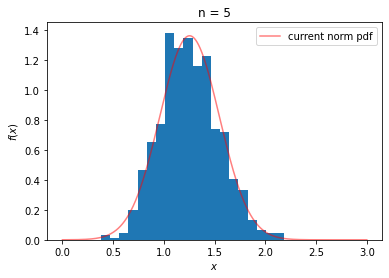

In [28]:
n = 5
sample_n5 = list()

# Сначала строим гистограмму по выборке объёма n
for i in range(0, 1001):
    tmp_sample = rayleigh_rv.rvs(n)
    cur_mean = sum(tmp_sample) / float(n)
    sample_n5.append(cur_mean)
    
plt.hist(sample_n5, bins=20, density = True)

# Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
norm_rv = sts.norm(th_mean, math.sqrt(th_disp / n))
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='current norm pdf', alpha=0.5, color='red')

plt.title('n = 5')
plt.legend(loc="upper right")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

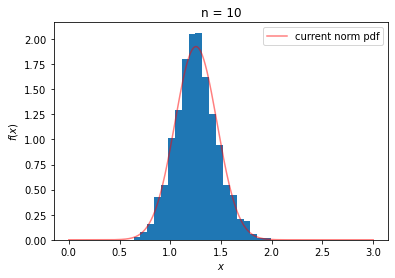

In [29]:
n = 10
sample_n10 = list()

# Сначала строим гистограмму по выборке объёма n
for i in range(0, 1001):
    tmp_sample = rayleigh_rv.rvs(n)
    cur_mean = sum(tmp_sample) / float(n)
    sample_n10.append(cur_mean)
    
plt.hist(sample_n10, bins=20, density = True)

# Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
norm_rv = sts.norm(th_mean, math.sqrt(th_disp / n))
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='current norm pdf', alpha=0.5, color='red')

plt.title('n = 10')
plt.legend(loc="upper right")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

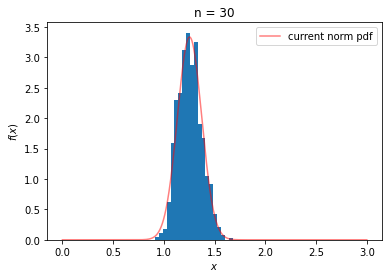

In [30]:
n = 30
sample_n30 = list()

# Сначала строим гистограмму по выборке объёма n
for i in range(0, 1001):
    tmp_sample = rayleigh_rv.rvs(n)
    cur_mean = sum(tmp_sample) / float(n)
    sample_n30.append(cur_mean)
    
plt.hist(sample_n30, bins=20, density = True)

# Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
norm_rv = sts.norm(th_mean, math.sqrt(th_disp / n))
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='current norm pdf', alpha=0.5, color='red')

plt.title('n = 30')
plt.legend(loc="upper right")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

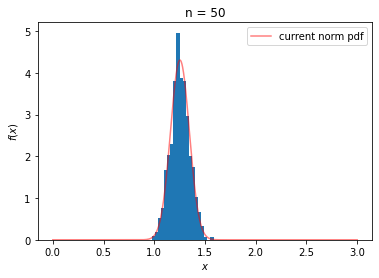

In [31]:
n = 50
sample_n50 = list()

# Сначала строим гистограмму по выборке объёма n
for i in range(0, 1001):
    tmp_sample = rayleigh_rv.rvs(n)
    cur_mean = sum(tmp_sample) / float(n)
    sample_n50.append(cur_mean)
    
plt.hist(sample_n50, bins=20, density = True)

# Теперь строим график плотности вероятности нормального распределения (по ЦПТ)
norm_rv = sts.norm(th_mean, math.sqrt(th_disp / n))
x = np.linspace(0, 3, 1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='current norm pdf', alpha=0.5, color='red')

plt.title('n = 50')
plt.legend(loc="upper right")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы.

С ростом n точность нормальной аппроксимации увеличивается.